In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

from jupyterthemes import jtplot
jtplot.style()

Populating the interactive namespace from numpy and matplotlib


In [37]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

Label 4


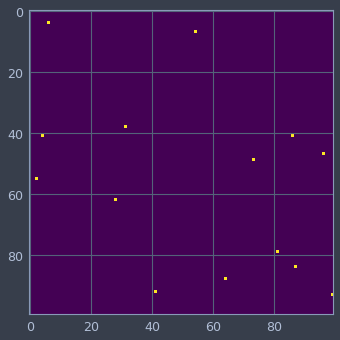

In [48]:
image, label = C.Weber.base10()
print 'Label', label
imshow(image)

Label 4


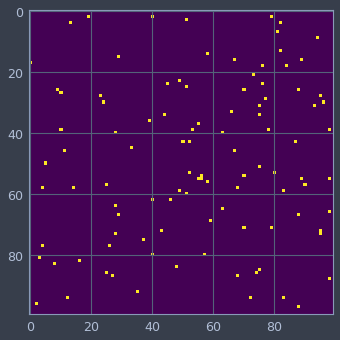

In [52]:
image, label = C.Weber.base100()
print 'Label', label
imshow(image)

Label 5


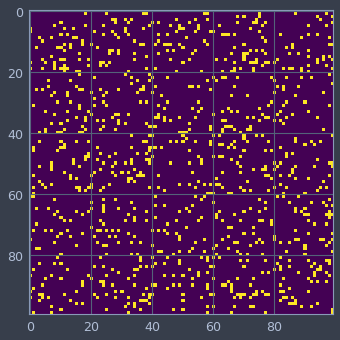

In [58]:
image, label = C.Weber.base1000()
print 'Label', label
imshow(image)